# Cyberbullying Detection using NLP
---

# Imports
---

In [163]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
import time

In [164]:
import nltk
# Ensure required NLTK resources are available. Downloads only if missing.
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    print("Downloading 'stopwords'...")
    nltk.download('stopwords')

try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    print("Downloading 'punkt' (tokenizer)...")
    nltk.download('punkt')

print('NLTK resources checked.')


NLTK resources checked.


# Loading the Dataset
---

In [165]:
df = pd.read_csv(r'E:\CAUTION, FUTURE AHEAD!!!!!!\cyber_bullying_detection\cyberbullying_tweets.csv', nrows = 20000)
df

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
19995,I am Christian who definitely does not support...,religion
19996,@yousufpoosuf @RKingLive2Dance @izrinhariri No...,religion
19997,How can you say Barack Obama was the best pres...,religion
19998,Another Mentally ill asylum seeker. WTHell do ...,religion


In [166]:
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [167]:
df.tail()

,tweet_text,cyberbullying_type
19995,I am Christian who definitely does not support...,religion
19996,@yousufpoosuf @RKingLive2Dance @izrinhariri No...,religion
19997,How can you say Barack Obama was the best pres...,religion
19998,Another Mentally ill asylum seeker. WTHell do ...,religion
19999,shame on you. Bhagat singh did not kill innoce...,religion


In [168]:
df.shape

(20000, 2)

# EDA
---

# 1. Handling Null Values

In [169]:
df.isna().any()

tweet_text            False
cyberbullying_type    False
dtype: bool

In [170]:
df.isna().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

# 2. Handling Duplicate Values

In [171]:
df.nunique()

tweet_text            19915
cyberbullying_type        3
dtype: int64

In [172]:
df['tweet_text'].nunique()

19915

# 3. Class Distributions

In [173]:
df['cyberbullying_type'].value_counts()

cyberbullying_type
gender               7973
not_cyberbullying    7945
religion             4082
Name: count, dtype: int64

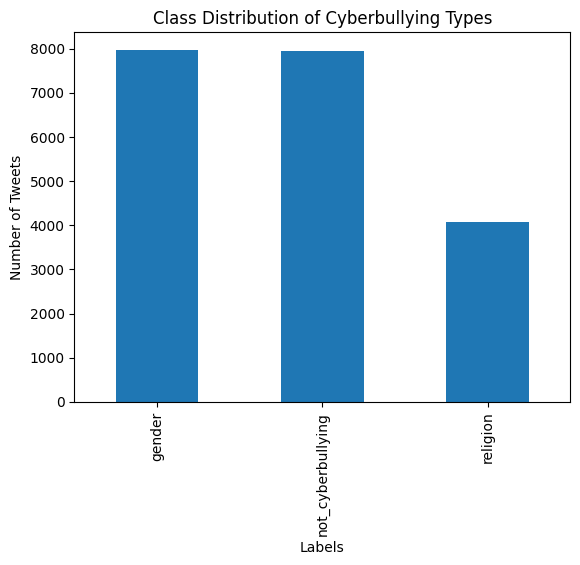

In [174]:
# Create a bar plot of the class distribution
class_counts = df['cyberbullying_type'].value_counts()
class_counts.plot(kind='bar')
plt.title('Class Distribution of Cyberbullying Types')
plt.xlabel('Labels')
plt.ylabel('Number of Tweets')
plt.show()

# 4. Word Count

In [175]:
from collections import Counter
import re

import nltk
from nltk.corpus import stopwords

In [176]:
# Concatenate all tweet texts into a single string
all_text = ' '.join(df['tweet_text'].values)
# Remove URLs, mentions, and hashtags from the text
all_text = re.sub(r'http\S+', '', all_text)
all_text = re.sub(r'@\S+', '', all_text)
all_text = re.sub(r'#\S+', '', all_text)
# Split the text into individual words
words = all_text.split()

In [177]:
# Remove stop words
stop_words = set(stopwords.words('english'))
words = [word for word in words if not word in stop_words]

In [178]:
# Count the frequency of each word
word_counts = Counter(words)
top_words = word_counts.most_common(100)
top_words

[('I', 5256),
 ('rape', 2962),
 ('gay', 2507),
 ('RT', 2103),
 ('jokes', 2038),
 ('like', 1739),
 ('people', 1336),
 ("I'm", 1167),
 ('&amp;', 1117),
 ('joke', 1114),
 ('The', 1021),
 ('call', 955),
 ('u', 942),
 ('You', 932),
 ('think', 896),
 ('get', 863),
 ('make', 862),
 ('women', 811),
 ('know', 739),
 ('one', 738),
 ('Muslim', 733),
 ('Muslims', 728),
 ('female', 703),
 ('sexist', 668),
 ('-', 650),
 ('And', 638),
 ('would', 637),
 ('jokes,', 615),
 ('Christian', 605),
 ('woman', 571),
 ('If', 561),
 ('support', 560),
 ('say', 542),
 ('even', 523),
 ('want', 520),
 ('see', 512),
 ('right', 504),
 ('men', 502),
 ('idiots', 488),
 ('never', 483),
 ('still', 469),
 ('But', 467),
 ('made', 458),
 ('go', 456),
 ('really', 451),
 ('idiot', 447),
 ('This', 445),
 ('A', 444),
 ('So', 443),
 ('making', 443),
 ('.', 430),
 ('Islamic', 429),
 ('bitch', 428),
 ('need', 418),
 ("can't", 412),
 ('hate', 410),
 ('Rape', 409),
 ('Kat', 399),
 ('What', 390),
 ('They', 386),
 ('said', 384),
 ('bul

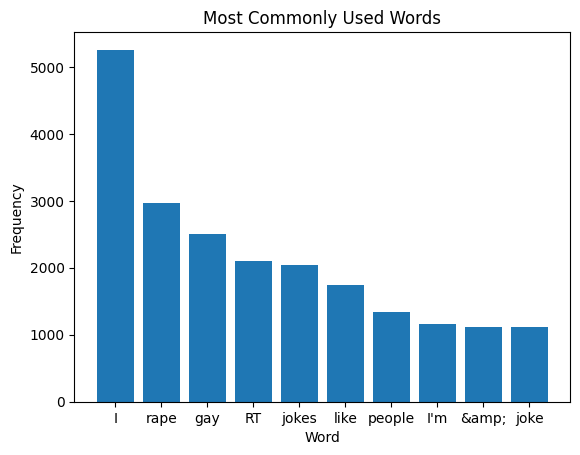

In [179]:
# Create a bar chart of the most common words
top_words = word_counts.most_common(10) # Change the number to show more/less words
x_values = [word[0] for word in top_words]
y_values = [word[1] for word in top_words]
plt.bar(x_values, y_values)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Commonly Used Words')
plt.show()

# Visualizations
---

# 1. Wordclouds

In [180]:
# Ensure 'wordcloud' package is installed. Installs only if missing.
try:
    from wordcloud import WordCloud
    print("wordcloud already installed")
except Exception:
    import sys, subprocess
    print("Installing 'wordcloud' package...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "wordcloud"])
    from wordcloud import WordCloud
    print("wordcloud installed")


wordcloud already installed


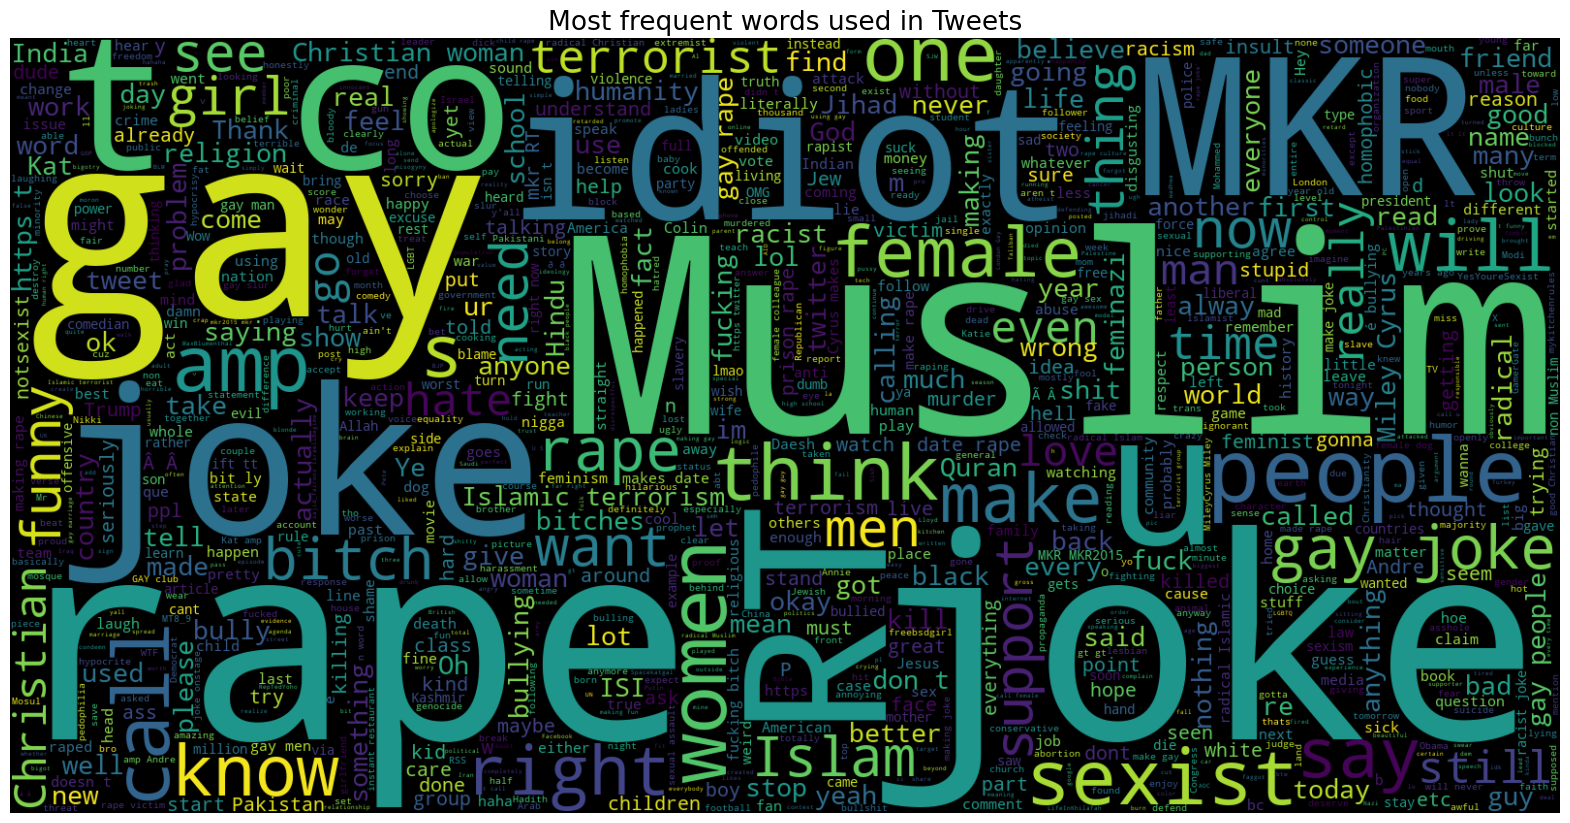

In [181]:
from wordcloud import WordCloud

text = ' '.join([word for word in df['tweet_text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=1000, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words used in Tweets', fontsize=19)
plt.show()

# 2. Sentiment Analysis Plot

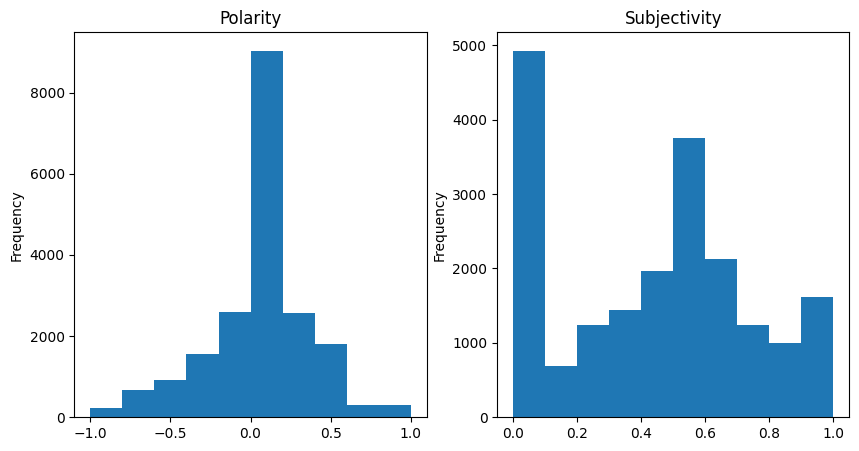

In [182]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure TextBlob is available at runtime; install if missing
try:
    from textblob import TextBlob
except Exception:
    import sys, subprocess
    print("TextBlob not found — installing textblob...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "textblob"]) 
    from textblob import TextBlob
    print("TextBlob installed")

# perform sentiment analysis on each text in DataFrame
sentiment_scores = []
for text in df['tweet_text']:
    analysis = TextBlob(text)
    sentiment_scores.append((analysis.sentiment.polarity, analysis.sentiment.subjectivity))

# create DataFrame with sentiment scores
sentiment_df = pd.DataFrame(sentiment_scores, columns=['polarity', 'subjectivity'])

# plot distribution of sentiment scores
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sentiment_df['polarity'].plot(kind='hist', ax=axes[0], title='Polarity')
sentiment_df['subjectivity'].plot(kind='hist', ax=axes[1], title='Subjectivity')
plt.show()


In [183]:
# Ensure 'textblob' package and corpora are installed. Installs/downloads only if missing.
try:
    from textblob import TextBlob
    print("textblob already installed")
except Exception:
    import sys, subprocess
    print("Installing 'textblob' package...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "textblob"]) 
    from textblob import TextBlob
    print("textblob installed")

# Download required corpora for TextBlob (WordNet/omw) and NLTK resources if missing
import nltk
try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    print("Downloading WordNet and omw-1.4 for TextBlob...")
    nltk.download('wordnet')
    nltk.download('omw-1.4')

# Run the textblob downloader as a final step (idempotent)
import subprocess, sys
try:
    subprocess.check_call([sys.executable, "-m", "textblob.download_corpora", "-q"])  # -q for quiet
    print('TextBlob corpora checked/downloaded.')
except Exception as e:
    print('Could not run textblob downloader (may not be available in this TextBlob version):', e)
    print('If sentiment functions fail, run `python -m textblob.download_corpora` manually.')


textblob already installed


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vanss\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\vanss\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


TextBlob corpora checked/downloaded.


# 3. Named Entity Recognition (NER) Plot

In [184]:
import spacy
from spacy import displacy

In [185]:
#sample text
text = df['tweet_text'].iloc[4]

#load pre-trained NER model (install if missing)
import spacy
from spacy import displacy
try:
    nlp = spacy.load('en_core_web_sm')
except OSError:
    import sys, subprocess
    print("spaCy model 'en_core_web_sm' not found — installing now...")
    subprocess.check_call([sys.executable, "-m", "spacy", "download", "en_core_web_sm"])
    nlp = spacy.load('en_core_web_sm')

#perform named entity recognition
doc = nlp(text)

#visualize named entities with fallback if display isn't available
try:
    from IPython.display import HTML, display
    html = displacy.render(doc, style='ent')
    display(HTML(html))
except Exception as e:
    print("Could not render via displacy in this environment:", e)
    print("Falling back to printing entities:\n")
    for ent in doc.ents:
        print(ent.text, ent.label_)


Could not render via displacy in this environment: cannot import name 'display' from 'IPython.core.display' (e:\CAUTION, FUTURE AHEAD!!!!!!\cyber_bullying_detection\env\Lib\site-packages\IPython\core\display.py)
Falling back to printing entities:

ISIS ORG
Kurdish NORP
Islam ORG


# 4. Part-of-Speech (POS) Tagging Plot

In [186]:
import spacy
from spacy import displacy

#sample text
text = df['tweet_text'].iloc[1]

#load pre-trained POS tagging model (install if missing)
try:
    nlp = spacy.load('en_core_web_sm')
except OSError:
    import sys, subprocess
    print("spaCy model 'en_core_web_sm' not found — installing now...")
    subprocess.check_call([sys.executable, "-m", "spacy", "download", "en_core_web_sm"])
    nlp = spacy.load('en_core_web_sm')

#perform POS tagging
doc = nlp(text)

#visualize POS tagging with fallback if display isn't available
try:
    from IPython.display import HTML, display
    html = displacy.render(doc, style='dep', options={'distance': 90})
    display(HTML(html))
except Exception as e:
    print("Could not render dependency parse via displacy in this environment:", e)
    print("Falling back to printing tokens with POS and dependency labels:\n")
    for token in doc:
        print(f"{token.text}\t{token.pos_}\t{token.dep_}\t(head: {token.head.text})")


Could not render dependency parse via displacy in this environment: cannot import name 'display' from 'IPython.core.display' (e:\CAUTION, FUTURE AHEAD!!!!!!\cyber_bullying_detection\env\Lib\site-packages\IPython\core\display.py)
Falling back to printing tokens with POS and dependency labels:

Why	SCONJ	advmod	(head: is)
is	AUX	ROOT	(head: is)
#	SYM	nsubj	(head: is)
aussietv	ADJ	acomp	(head: is)
so	ADV	advmod	(head: white)
white	ADJ	acomp	(head: is)
?	PUNCT	punct	(head: is)
#	SYM	nmod	(head: theblock)
MKR	NOUN	compound	(head: #)
#	SYM	nmod	(head: theblock)
theblock	NOUN	ROOT	(head: theblock)
#	NOUN	appos	(head: theblock)
ImACelebrityAU	NOUN	nummod	(head: theblock)
#	SYM	punct	(head: theblock)
today	NOUN	npadvmod	(head: theblock)
#	SYM	punct	(head: theblock)
sunrise	NOUN	compound	(head: studio10)
#	SYM	dep	(head: sunrise)
studio10	NOUN	appos	(head: theblock)
#	SYM	nmod	(head: Neighbours)
Neighbours	PROPN	nmod	(head: WonderlandTen)
#	SYM	nmod	(head: WonderlandTen)
WonderlandTen	PROPN	appo

# 5. Topic Modeling Visualization

In [187]:
!pip install pyLDAvis


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [188]:
import gensim
import pyLDAvis 
from pyLDAvis import *
import pyLDAvis.gensim as gensimvis

# Preprocessing
tokens = [[word for word in sentence.split()] for sentence in df['tweet_text']]
dictionary = gensim.corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]

# Topic Modeling
num_topics = 10
lda_model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)

# Visualization
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.318563 -0.010181       1        1  60.036631
3      0.184367 -0.072908       2        1  10.400449
0      0.107812 -0.003117       3        1   6.140600
2      0.033004  0.259456       4        1   5.560135
5      0.108774 -0.071551       5        1   5.212679
9     -0.183978 -0.046635       6        1   3.307043
7     -0.128416 -0.030356       7        1   2.623819
8     -0.165019 -0.017500       8        1   2.367881
6     -0.132019 -0.014135       9        1   2.225692
4     -0.143088  0.006926      10        1   2.125072, topic_info=           Term          Freq         Total Category  logprob  loglift
1141        gay   2271.000000   2271.000000  Default  30.0000  30.0000
8069       rape   2424.000000   2424.000000  Default  29.0000  29.0000
6926  Christian   1443.000000   1443.000000  Default  28.0000  28.0000
91            I   5091.000000   5091.000000  Default  27.0000  27.0000
25            a  10681.000000  10681.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
6784    people.     81.474750    100.836511  Topic10  -4.7274   3.6382
133       state     49.588698     87.427687  Topic10  -5.2239   3.2843
843         And     45.043910    850.353023  Topic10  -5.3200   0.9134
2333      Don't     32.816577    220.587431  Topic10  -5.6367   1.9460
25            a     35.406669  10681.558154  Topic10  -5.5608  -1.8580

[588 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
8062      4  0.018265    #Islam
8062      5  0.977195    #Islam
10        1  0.404106      #MKR
10        2  0.249760      #MKR
10        3  0.134702      #MKR
...     ...       ...       ...
520       3  0.091446  yourself
520       5  0.676700  yourself
520       8  0.009145  yourself
520      10  0.018289  yourself
8689      1  0.998935    you’re

[1262 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 1, 3, 6, 10, 8, 9, 7, 5])

# Natural Language Processing
---

# 1. Data Cleaning

In [189]:
# Clean the data
def clean_text(text):
    # Remove HTML tags
    text = re.sub('<.*?>', '', text)
    
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    
    # Remove URLs, mentions, and hashtags from the text
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'#\S+', '', text)
    
    # Tokenize the text
    words = nltk.word_tokenize(text)
    
    # Remove stopwords
    words = [w for w in words if w not in stopwords.words('english')]
    
    # Stem the words
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]
    
    # Join the words back into a string
    text = ' '.join(words)
    return text

In [190]:
%%time

tqdm.pandas()

df['cleaned_text'] = df['tweet_text'].progress_apply(clean_text)

100%|██████████| 20000/20000 [01:27<00:00, 229.36it/s]

CPU times: total: 1min 25s
Wall time: 1min 27s


# 2. Feature Extraction

In [191]:
# Create the Bag of Words model
cv = CountVectorizer()
X = cv.fit_transform(df['cleaned_text']).toarray()
y = df['cyberbullying_type']

In [192]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Classification Model
---

# 1. Logistic Regression Model

In [193]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# train a Logistic Regression Model
clf = LogisticRegression(max_iter = 1000)

In [194]:
clf.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


# 2. Predictions

In [195]:
# evaluate the classifier on the test set
y_pred = clf.predict(X_test)
y_pred

array(['gender', 'not_cyberbullying', 'gender', ..., 'gender',
       'not_cyberbullying', 'gender'], shape=(4000,), dtype=object)

# 3. Accuracy Score

In [196]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.914


# 4. Confusion Matrix

In [197]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1424,  175,    3],
       [  70, 1499,   31],
       [   9,   56,  733]])

<Axes: >

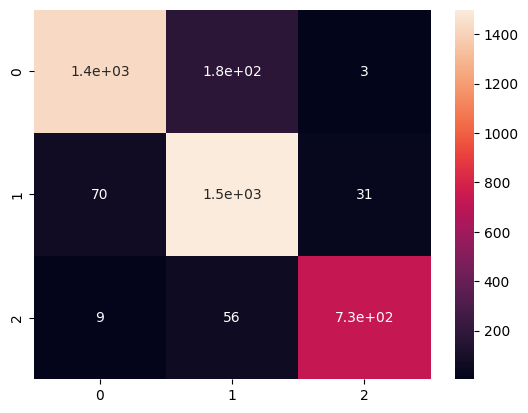

In [198]:
import seaborn as sns
sns.heatmap(cm, annot=True)

# 5. Classification Report

In [199]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

                   precision    recall  f1-score   support

           gender       0.95      0.89      0.92      1602
not_cyberbullying       0.87      0.94      0.90      1600
         religion       0.96      0.92      0.94       798

         accuracy                           0.91      4000
        macro avg       0.92      0.91      0.92      4000
     weighted avg       0.92      0.91      0.91      4000



# Thank You
---